In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("diabetes.csv", header=None, names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.loc[:, df.columns != 'label']
y = df[['label']]

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [6]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]], dtype=int64)

In [7]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Recall: 0.5806451612903226
F1 Score: 0.6605504587155964


#### Data exploration for the Imbalance problem

In [8]:
df['label'].value_counts()

0    500
1    268
Name: label, dtype: int64

In [9]:
len(df)

768

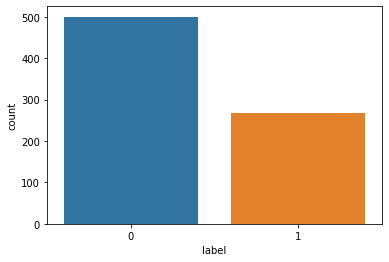

In [10]:
import seaborn as sns
sns.countplot(x='label',data=df)
plt.show()

#### Applying SMOTE

In [11]:
df.label.value_counts()

0    500
1    268
Name: label, dtype: int64

In [12]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [13]:
#Class imbalance problem have been dealt
np.bincount(y_train)

array([370, 370], dtype=int64)

In [14]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [15]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[101,  29],
       [ 12,  50]], dtype=int64)

In [16]:
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7864583333333334
Recall: 0.8064516129032258
F1 Score: 0.7092198581560284


Though the accuracy have been reduced applying SMOTE, the recall value has increased by a lot. Hence it is preferrable.
In disease detection problems it is always recommended to go with the better recall score. Speaking about the thumb rule go with the better f1 score!